### Stop words tutorial

In [26]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

len(STOP_WORDS)

326

In [104]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if token.is_stop:
        print(token)

We
just
our
the
part
is


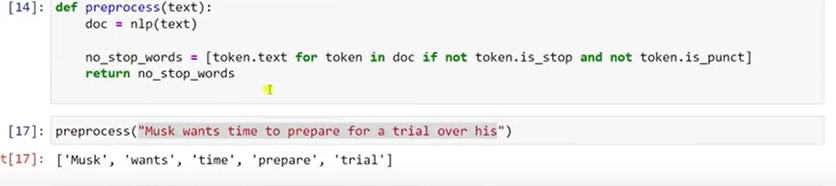

In [64]:
def preprocess(text):
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)            

In [103]:
preprocess("Musk wants time to prepare for a trial over his")

'Musk wants time prepare trial'

In [105]:
preprocess("The other is not other but your divine brother")

'divine brother'

##### Remove stop words from pandas dataframe text column

Dataset is downloaded from: https://www.kaggle.com/datasets/jbencina/department-of-justice-20092018-press-releases
It contains press releases of different court cases from depart of justice (DOJ). The releases contain information such as outcomes of criminal cases, notable actions taken against felons, or other updates about the current administration.

In [97]:
import pandas as pd

df = pd.read_json("doj_press.json",lines=True)

df.shape

(13087, 6)

In [98]:
df.head(5)

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


Filter out those rows that do not have any topics associated with the case

In [82]:
df = df[df["topics"].str.len() != 0]
df.head()

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [99]:
df.shape

(13087, 6)

In [84]:
df =df.head(100)
df.shape

(100, 6)

In [87]:
df["contents_new"] = df.contents.apply(preprocess)

In [88]:
df

,id,title,contents,date,topics,components,contents_new
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],"U.S. Department Justice , U.S. Environmental P..."
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division],131 - count criminal indictment unsealed today...
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U...",United States Attorney Office Middle District ...
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division],"21st Century Oncology LLC , agreed pay $ 19.75..."
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]",21st Century Oncology Inc. certain subsidiarie...
...,...,...,...,...,...,...,...
316,15-1359,Alaska Plastic Surgeon Convicted of Wire Fraud...,Doctor Hid Millions in Secret Accounts in Pana...,2015-11-04T00:00:00-05:00,[Tax],[Tax Division],Doctor Hid Millions Secret Accounts Panama Ala...
318,16-396,Alaska Plastic Surgeon Sentenced to Prison for...,Defendant Concealed Bank Accounts in Panama an...,2016-04-04T00:00:00-04:00,[Tax],[Tax Division],Defendant Concealed Bank Accounts Panama Costa...
321,17-736,Alaskan Commercial Fishing Couple Charged with...,An Alaskan couple was charged in federal court...,2017-07-26T00:00:00-04:00,[Tax],"[Tax Division, USAO - Alaska]","Alaskan couple charged federal court Juneau , ..."
322,18-717,Alaskan Husband And Wife Plead Guilty To Willf...,A husband and wife pleaded guilty yesterday to...,2018-06-01T00:00:00-04:00,[Tax],[Tax Division],husband wife pleaded guilty yesterday counts w...


In [89]:
len(df.contents[4])

6286

In [90]:
len(df.contents_new[4])

4810

In [94]:
df.contents[4][:300]

'The U.S. Department of Justice, the U.S. Environmental Protection Agency (EPA), and the Rhode Island Department of Environmental Management (RIDEM) announced today that two subsidiaries of Stanley Black & Decker Inc.—Emhart Industries Inc. and Black & Decker Inc.—have agreed to clean up dioxin conta'

In [95]:
df.contents_new[4][:300]

'U.S. Department Justice , U.S. Environmental Protection Agency ( EPA ) , Rhode Island Department Environmental Management ( RIDEM ) announced today subsidiaries Stanley Black & Decker Inc.—Emhart Industries Inc. Black & Decker Inc.—have agreed clean dioxin contaminated sediment soil Centredale Manor'

##### Examples where removing stop words can create a problem

**(1) Sentiment detection: Not always but in some cases, based on your dataset it can change the sentiment of a sentence if you remove stop words**

In [31]:
preprocess("this is a good movie")

'good movie'

In [32]:
preprocess("this is not a good movie")

'good movie'

**(2) Language translation: Say you want to translate following sentence from english to telugu. Before actual translation if you remove stop words and then translate, it will produce horrible result**

In [35]:
preprocess("how are you doing dhaval?")

'dhaval ?'

**(3) Chat bot or any Q&A system**

In [39]:
preprocess("I don't find yoga mat on your website. Can you help?")

'find yoga mat website . help ?'